<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

In [3]:
# Fungsi untuk menampilkan gambar
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        if len(img.shape) == 2:  # Grayscale image
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

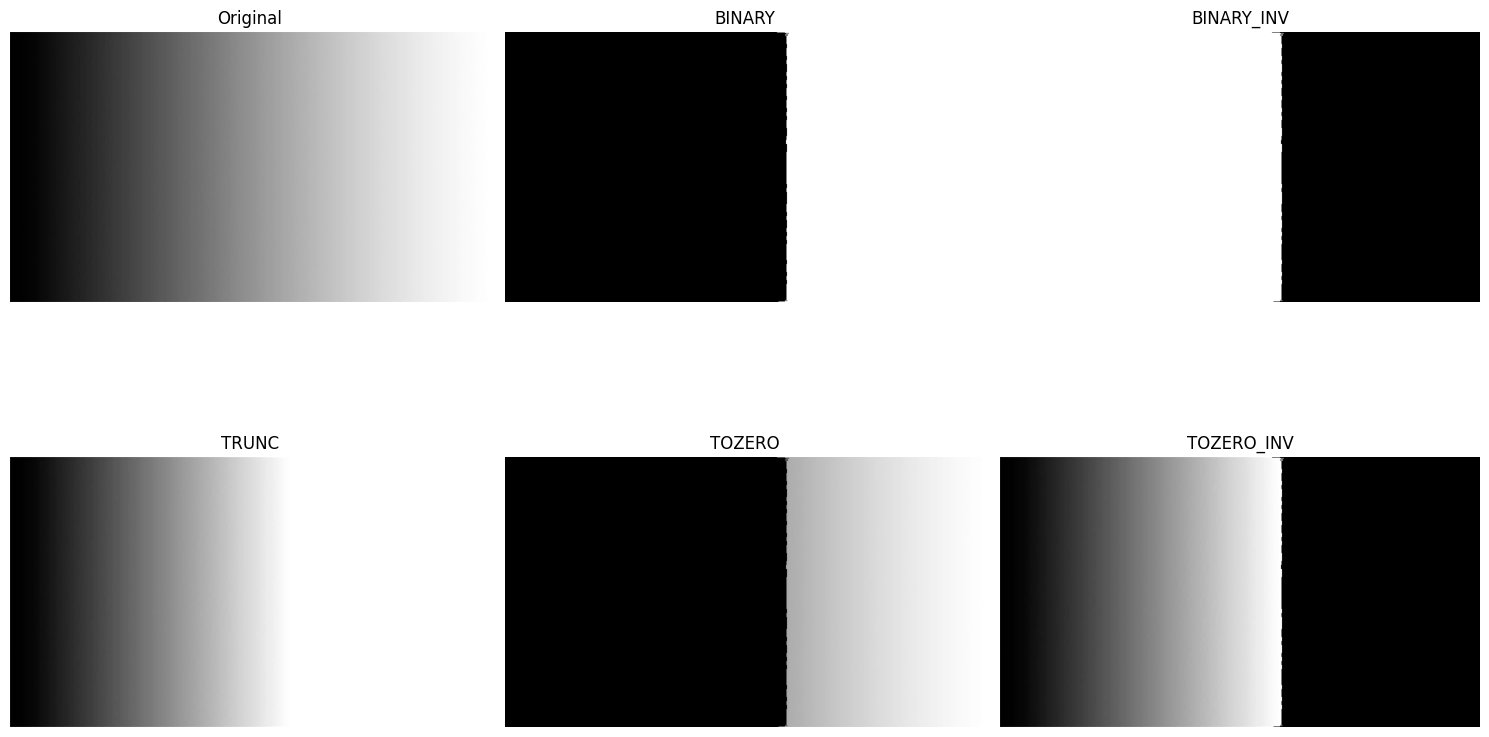

In [6]:
filename = '/content/drive/MyDrive/images/gradient.jpg'

# Membaca gambar dalam format grayscale
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Menetapkan nilai threshold
threshold = 170

# Threshold BINARY
binary = np.where(image > threshold, 255, 0).astype(np.uint8)

# Threshold BINARY_INV
binary_inv = np.where(image > threshold, 0, 255).astype(np.uint8)

# Threshold TRUNC
trunc = np.where(image > threshold, threshold, image).astype(np.uint8)

# Threshold TOZERO
tozero = np.where(image > threshold, image, 0).astype(np.uint8)

# Threshold TOZERO_INV
tozero_inv = np.where(image > threshold, 0, image).astype(np.uint8)

# Menampilkan hasil
images = [image, binary, binary_inv, trunc, tozero, tozero_inv]
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
display_images(images, titles)

Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

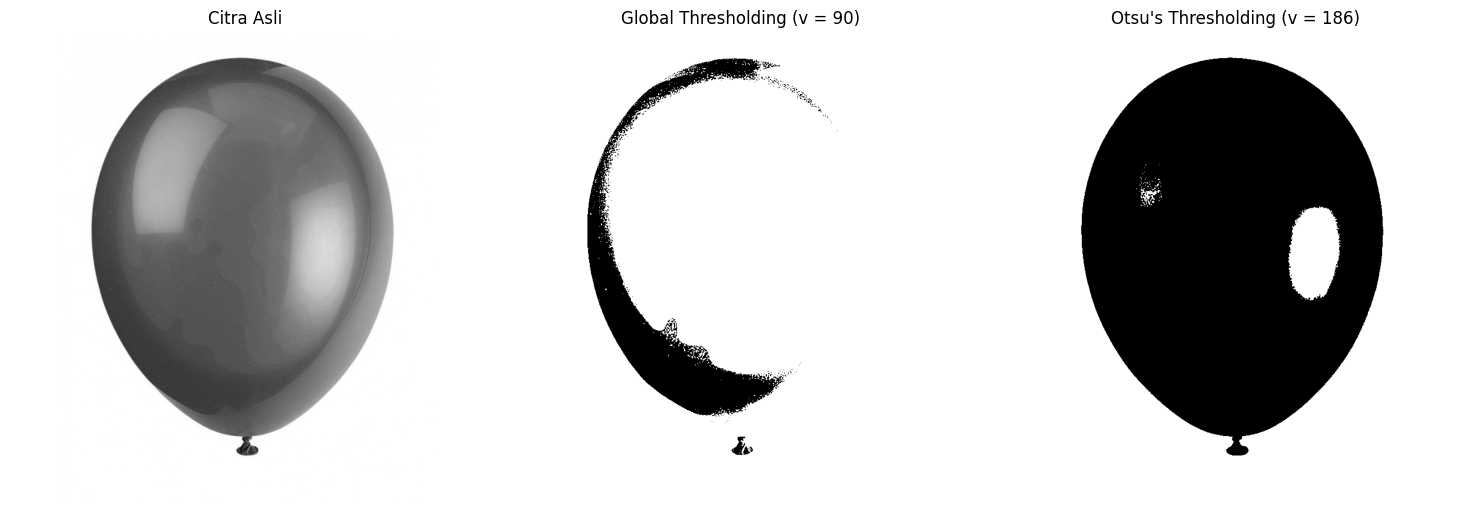

In [8]:
# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Mendapatkan histogram dan total jumlah piksel
histogram, _ = np.histogram(image.ravel(), bins=256, range=[0, 256])
total_pixels = image.size

# Menghitung probabilitas tiap tingkat intensitas
probabilities = histogram / float(total_pixels)

# Inisialisasi variabel untuk nilai maksimum dan threshold optimal
max_variance = 0
optimal_threshold = 0

# Perhitungan antar dan dalam kelas
for t in range(256):
    # Hitung bobot kelas latar belakang dan latar depan
    weight_bg = probabilities[:t].sum()
    weight_fg = probabilities[t:].sum()

    if weight_bg == 0 or weight_fg == 0:
        continue

    # Hitung rata-rata kelas latar belakang dan latar depan
    mean_bg = np.dot(np.arange(t), probabilities[:t]) / weight_bg
    mean_fg = np.dot(np.arange(t, 256), probabilities[t:]) / weight_fg

    # Hitung varians antar kelas
    variance_between = weight_bg * weight_fg * (mean_bg - mean_fg) ** 2

    # Memeriksa apakah ini varians antar kelas maksimum
    if variance_between > max_variance:
        max_variance = variance_between
        optimal_threshold = t

# Menerapkan threshold optimal ke gambar
otsu_thresholded = (image > optimal_threshold).astype(np.uint8) * 255
global_thresholded = (image > 90).astype(np.uint8) * 255

# Menampilkan hasil
images = [image, global_thresholded, otsu_thresholded]
titles = ['Citra Asli', 'Global Thresholding (v = 90)', f"Otsu's Thresholding (v = {optimal_threshold})"]
display_images(images, titles)


Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

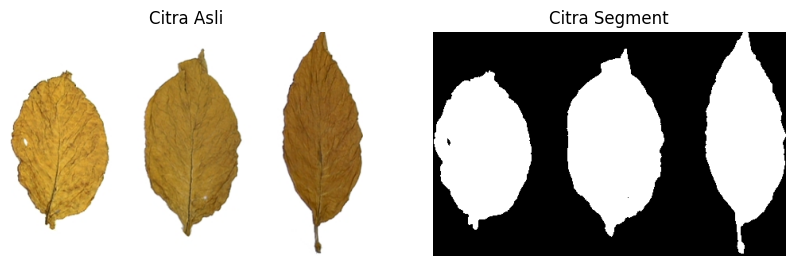

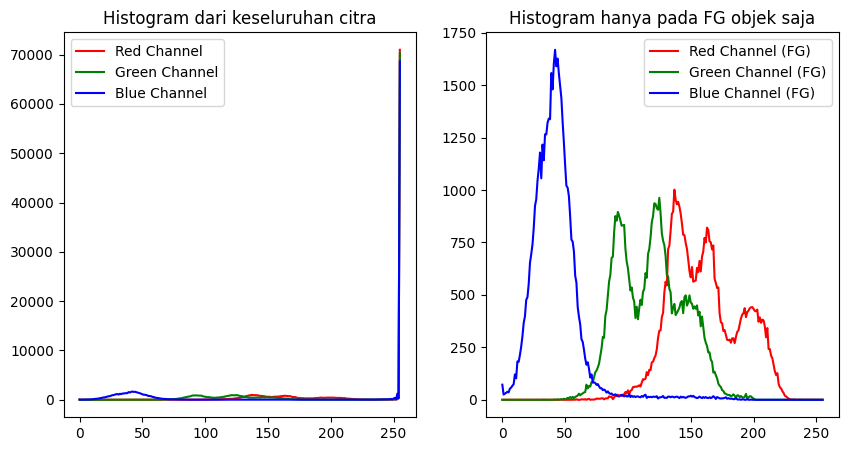

In [11]:
# Membaca gambar berwarna dan gambar grayscale
image = cv2.imread('/content/drive/MyDrive/images/images/tobacco.jpg')
image_gray = cv2.imread('/content/drive/MyDrive/images/images/tobacco.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat mask untuk mendapatkan area foreground
threshold_value = 200
_, mask = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Menampilkan gambar asli dan mask menggunakan Matplotlib
plt.figure(figsize=(10, 20))

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Menampilkan mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')
plt.axis('off')
plt.show()

# Menghitung histogram untuk masing-masing saluran warna dari citra asli
hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

# Menampilkan histogram dari keseluruhan citra
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.title('Histogram dari keseluruhan citra')
plt.legend()

# Menghitung histogram hanya pada area foreground (berdasarkan mask)
hist_b_fg = cv2.calcHist([image], [0], mask, [256], [0, 256])
hist_g_fg = cv2.calcHist([image], [1], mask, [256], [0, 256])
hist_r_fg = cv2.calcHist([image], [2], mask, [256], [0, 256])

# Menampilkan histogram dari area foreground saja
plt.subplot(1, 2, 2)
print()
plt.plot(hist_r_fg, color='red', label='Red Channel (FG)')
plt.plot(hist_g_fg, color='green', label='Green Channel (FG)')
plt.plot(hist_b_fg, color='blue', label='Blue Channel (FG)')
plt.title('Histogram hanya pada FG objek saja')
plt.legend()
plt.show()

Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

Centroids warna (RGB):
Cluster 0: [64 76 12]
Cluster 1: [253 252 251]
Cluster 2: [252 207   3]
Cluster 3: [200  88  81]
Cluster 4: [172  19  16]
Cluster 5: [210 190 158]
Cluster 6: [132 162  45]


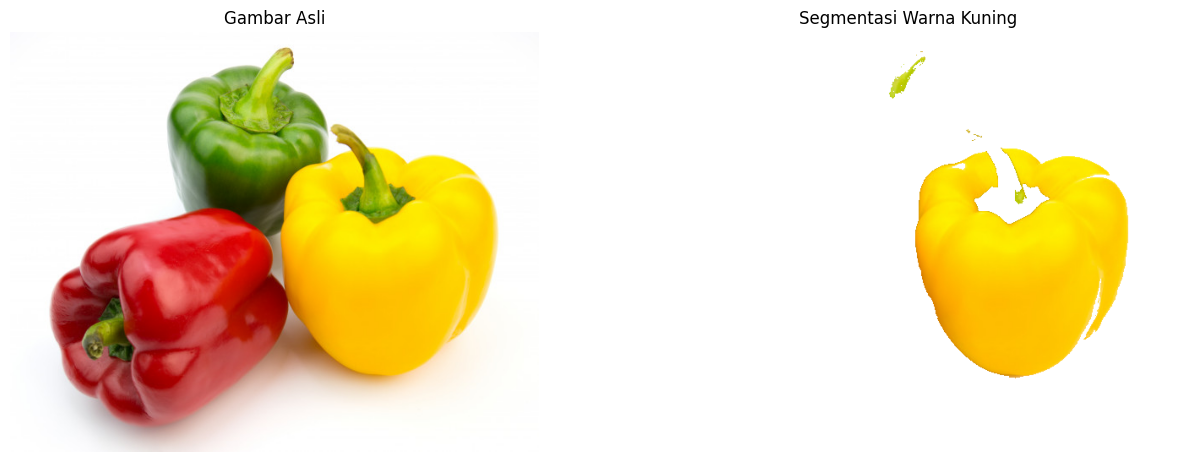

In [12]:
from sklearn.cluster import KMeans

# Membaca gambar dan mengubahnya ke format RGB
image = cv2.imread('/content/drive/MyDrive/images/images/peppers.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Meratakan gambar menjadi array 2D dengan fitur warna RGB
pixels = image_rgb.reshape((-1, 3))

# Melakukan K-Means clustering pada fitur warna
num_clusters = 7  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixels)

# Mendapatkan label dan centroid warna
labels = kmeans.labels_
centroids = np.round(kmeans.cluster_centers_).astype(int)

# Menampilkan centroid warna (RGB)
print("Centroids warna (RGB):")
for idx, color in enumerate(centroids):
    print(f"Cluster {idx}: {color}")

# Menentukan cluster yang paling mendekati warna kuning (RGB: [255, 255, 0])
yellow_rgb = np.array([255, 255, 0])
distance = np.linalg.norm(centroids - yellow_rgb, axis=1)
target_cluster = np.argmin(distance)

# Membuat mask untuk menyegmentasi warna kuning
mask = (labels == target_cluster)
segmented_pixels = np.full_like(pixels, 255)
segmented_pixels[mask] = pixels[mask]

# Mengembalikan array ke bentuk gambar asli
segmented_image = segmented_pixels.reshape(image_rgb.shape)

# Menampilkan gambar asli dan hasil segmentasi
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmentasi Warna Kuning')
plt.axis('off')
plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.

Jawab:\
Kendala utama K-Means adalah ketidaktepatan dalam menangkap warna yang diinginkan karena variasi warna, cluster yang tumpang tindih, sensitifnya jumlah cluster, dan pengaruh noise atau gradasi yang bikin segmentasi kurang akurat.

Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

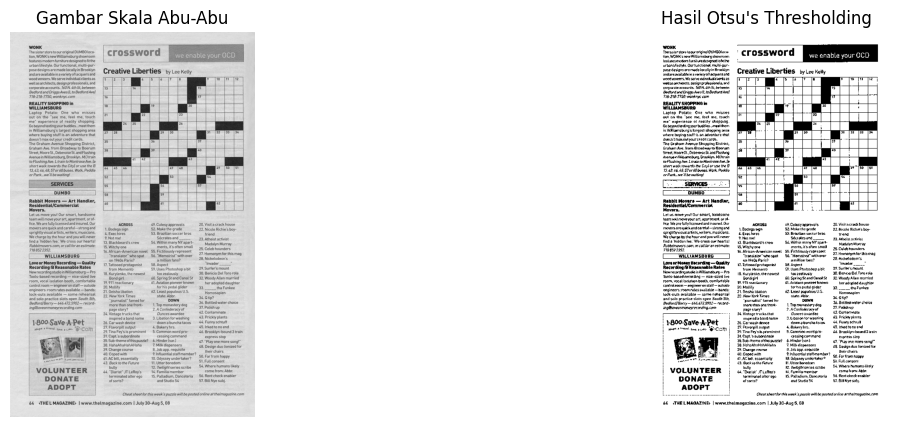

In [13]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/images/images/crossword.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menerapkan Otsu's thresholding
_, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Gambar Skala Abu-Abu')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Hasil Otsu's Thresholding")
plt.axis('off')

plt.show()